## Import

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## News sentiment

C:\Users\Justin\AppData\Local\Temp\ipykernel_10516\2027707344.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2])


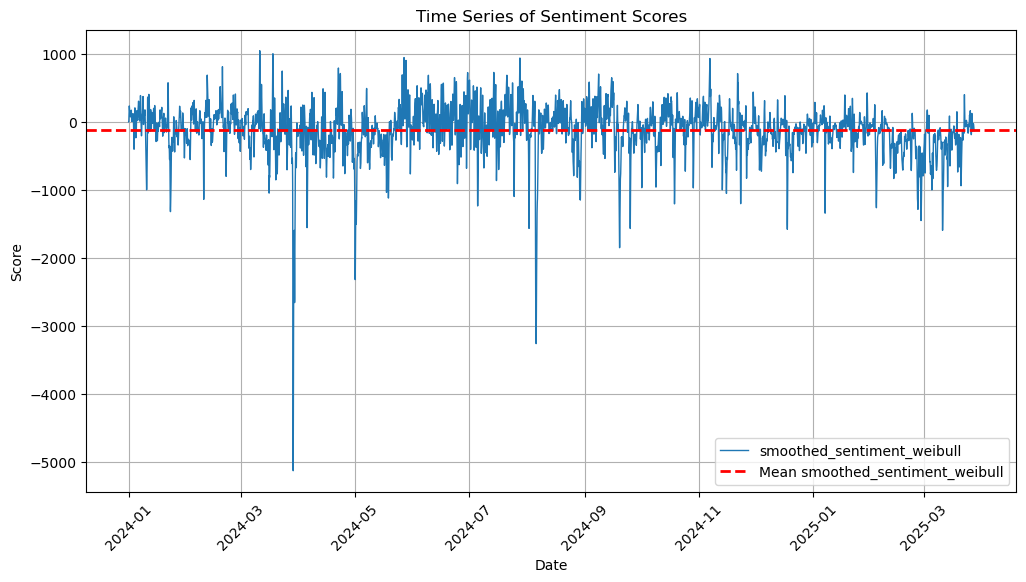

In [4]:
GDELT_folder_path = '../data/GDELT_Bitcoin_Sentiment/'
GDELT_file1 = os.path.join(GDELT_folder_path, "GDELT_48hr_weibull_27Mar_update_part1.csv")
GDELT_file2 = os.path.join(GDELT_folder_path,"GDELT_48hr_weibull_27Mar_update_part2.csv")


# Read CSV files
df1 = pd.read_csv(GDELT_file1)
df2 = pd.read_csv(GDELT_file2)

# Merge the two datasets
df = pd.concat([df1, df2])

# Select only specific columns
# df = df[['DATE', 'OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']]
df = df.reset_index(drop=True).rename(columns={'Unnamed: 0': 'DATE'})
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensure numeric columns are actually numeric
# numeric_cols = ['OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']
# df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort by date to ensure correct time series plotting
df = df.sort_values(by='DATE')

# start_date = df['DATE'].min()
# end_date = start_date + pd.Timedelta(weeks=60)
# df_filtered = df[(df['DATE'] >= start_date) & (df['DATE'] < end_date)]

# Aggregate by hour instead of day: Compute the daily mean for each sentiment score
# df_daily = df_filtered.resample('H', on='DATE').mean().reset_index()

# Calculate the mean of 'NormalizedDecayedSentiment' for the first x weeks
mean_normalized_sentiment = df['smoothed_sentiment_weibull'].mean()

# Plot the time series with 3 lines
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['smoothed_sentiment_weibull'], label='smoothed_sentiment_weibull', linewidth=1)
plt.axhline(y=mean_normalized_sentiment, color='red', linestyle='--', linewidth=2, label="Mean smoothed_sentiment_weibull")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [5]:
GDELT_df = df.rename(columns={'smoothed_sentiment_weibull_week': 'news_smoothed_sentiment_weibull_week'})
GDELT_df['DATE'] = pd.to_datetime(GDELT_df['DATE']).dt.tz_localize('UTC')
GDELT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   DATE                        10849 non-null  datetime64[ns, UTC]
 1   smoothed_sentiment_weibull  10849 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 169.6 KB


In [6]:
GDELT_df.head(10)

,DATE,smoothed_sentiment_weibull
0,2024-01-01 00:00:00+00:00,0.000000
1,2024-01-01 01:00:00+00:00,-0.547465
2,2024-01-01 02:00:00+00:00,15.977209
3,2024-01-01 03:00:00+00:00,56.542854
4,2024-01-01 04:00:00+00:00,106.318283
5,2024-01-01 05:00:00+00:00,148.524367
6,2024-01-01 06:00:00+00:00,194.379554
7,2024-01-01 07:00:00+00:00,227.973406
8,2024-01-01 08:00:00+00:00,234.945428
9,2024-01-01 09:00:00+00:00,218.323247


## BTC Price and Reddit Sentiment

In [7]:
processed_data_folder_path = '../data/processed/'
btc_reddit_data_path = os.path.join(processed_data_folder_path, "btc_usdt_hourly_processed_with_sentiment_till_26_march_48hour_decay.csv")
btc_reddit_data = pd.read_csv(btc_reddit_data_path)

# Convert DATE column to datetime format
btc_reddit_data['datetime'] = pd.to_datetime(btc_reddit_data['datetime'])
btc_reddit_data = btc_reddit_data.sort_values(by='datetime')

In [8]:
btc_reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datetime                    10176 non-null  datetime64[ns, UTC]
 1   OPEN                        10176 non-null  float64            
 2   HIGH                        10176 non-null  float64            
 3   LOW                         10176 non-null  float64            
 4   CLOSE                       10176 non-null  float64            
 5   TOTAL_TRADES                10176 non-null  int64              
 6   TOTAL_TRADES_BUY            10176 non-null  int64              
 7   TOTAL_TRADES_SELL           10176 non-null  int64              
 8   VOLUME                      10176 non-null  float64            
 9   VOLUME_BUY                  10176 non-null  float64            
 10  VOLUME_SELL                 10176 non-null  float64       

In [9]:
btc_reddit_data

,datetime,OPEN,HIGH,LOW,CLOSE,TOTAL_TRADES,TOTAL_TRADES_BUY,TOTAL_TRADES_SELL,VOLUME,VOLUME_BUY,VOLUME_SELL,return,log_return,hourly_volatility,EMA_8,EMA_13,EMA_21,EMA_Signal,EMA_short,EMA_long,MACD,Signal_Line,MACD_Signal,MACD_Hist,SMA20,STD20,Upper_BB,Lower_BB,RSI_14,BB_RSI_Signal,RSI_Signal,SMA_50,SMA_200,GoldenCross_Signal,%K,%D,Stochastic_Signal,OBV,OBV_EMA20,OBV_Signal,H-L,H-PC,L-PC,TR,ATR,smoothed_sentiment,smoothed_sentiment_weibull,post_density
0,2024-01-27 13:00:00+00:00,41750.00,41806.55,41725.21,41742.44,35569,10171,25398,419.38468,187.70449,231.68019,-0.000181,-0.000181,0.002460,41729.550796,41714.525206,41617.761701,1,41720.541302,41533.453446,187.087856,256.308536,0,-69.220681,41814.7665,145.139023,42105.044546,41524.488454,45.171588,0,0,40928.6316,40765.60695,0,72.793587,71.453152,0,-419.38468,-65.712408,0,81.34,56.55,24.79,81.34,175.710000,0.000000,0.000000e+00,2.0
1,2024-01-27 14:00:00+00:00,41742.44,41818.39,41731.01,41766.00,27238,12281,14957,493.43458,233.95644,259.47814,0.000564,0.000564,0.002463,41737.650619,41721.878748,41631.237910,1,41727.534948,41550.679117,176.855831,240.417995,0,-63.562164,41797.8160,128.274352,42054.364704,41541.267296,48.792247,0,0,40966.7554,40767.06695,0,79.088844,75.565353,0,493.43458,-12.460314,1,87.38,75.95,11.43,87.38,140.500000,1.983623,1.525704e-01,0.0
2,2024-01-27 15:00:00+00:00,41766.00,41894.87,41733.60,41814.00,32410,14004,18406,581.25856,268.18654,313.07202,0.001149,0.001149,0.002486,41754.617148,41735.038927,41647.852645,1,41740.837263,41570.184367,170.652896,226.464975,0,-55.812079,41785.2915,112.071762,42009.435023,41561.147977,49.710914,0,0,41004.7586,40769.71570,0,91.914496,81.265642,0,581.25856,44.084341,0,161.27,128.87,32.40,161.27,109.318333,1.900289,8.936436e-01,0.0
3,2024-01-27 16:00:00+00:00,41814.00,41895.74,41791.22,41810.18,30278,13664,16614,609.18361,315.81592,293.36769,-0.000091,-0.000091,0.002476,41766.964449,41745.773366,41662.609678,1,41751.505377,41587.961822,163.543555,213.880691,0,-50.337136,41776.9415,102.865601,41982.672702,41571.210298,48.277493,0,0,41040.7034,40772.31665,0,90.893788,87.299043,0,-609.18361,-18.131655,-1,104.52,81.74,22.78,104.52,101.921667,1.816956,1.492957e+00,0.0
4,2024-01-27 17:00:00+00:00,41810.18,41845.34,41774.07,41779.28,24681,9330,15351,448.23397,165.47870,282.75527,-0.000739,-0.000739,0.002416,41769.701238,41750.560028,41673.216071,1,41755.778396,41602.133538,153.644857,201.833525,0,-48.188667,41765.9665,88.683186,41943.332872,41588.600128,47.852739,0,0,41080.2042,40774.22120,0,82.637275,88.481853,-1,-448.23397,-59.093780,0,71.27,35.16,36.11,71.27,99.801667,1.733623,1.870387e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2025-03-26 08:00:00+00:00,88140.45,88200.00,87886.10,87959.73,59816,30655,29161,525.11331,236.22879,288.88452,-0.002050,-0.002052,0.003058,87756.884904,87689.841782,87613.211597,1,87700.669674,87561.527416,139.142257,118.729110,0,20.413147,87716.7590,279.038251,88274.835502,87158.682498,52.079917,0,0,87529.5676,85079.73220,0,81.688856,86.723553,-1,-525.11331,59.670458,-1,313.90,59.55,254.35,313.90,418.066667,0.000000,-2.776625e-26,0.0
10172,2025-03-26 09:00:00+00:00,87959.73,88056.61,87837.49,87939.99,43067,23857,19210,393.09750,206.51437,186.58313,-0.000224,-0.000224,0.003034,87797.574925,87725.577241,87642.918724,1,87737.488186,87589.561682,147.926504,124.568589,0,23.357915,87734.0385,281.749543,88297.537586,87170.539414,47.097936,0,0,87550.8770,85103.62230,0,79.688735,87.125864,0,-393.09750,16.549700,0,219.12,96.88,122.24,219.12,392.118333,0.000000,0.000000e+00,0.0
10173,2025-03-26 10:00:00+00:00,87939.99,88259.81,87939.99,88208.47,55584,29793,25791,556.20541,297.60360,258.60181,0.003053,0.003048,0.002934,87888.884942,87794.561921,87694.332477,1,87809.946926,87635.406742,174.540184,134.562908,0,39.977276,87743.3420,294.553640,88332.44928

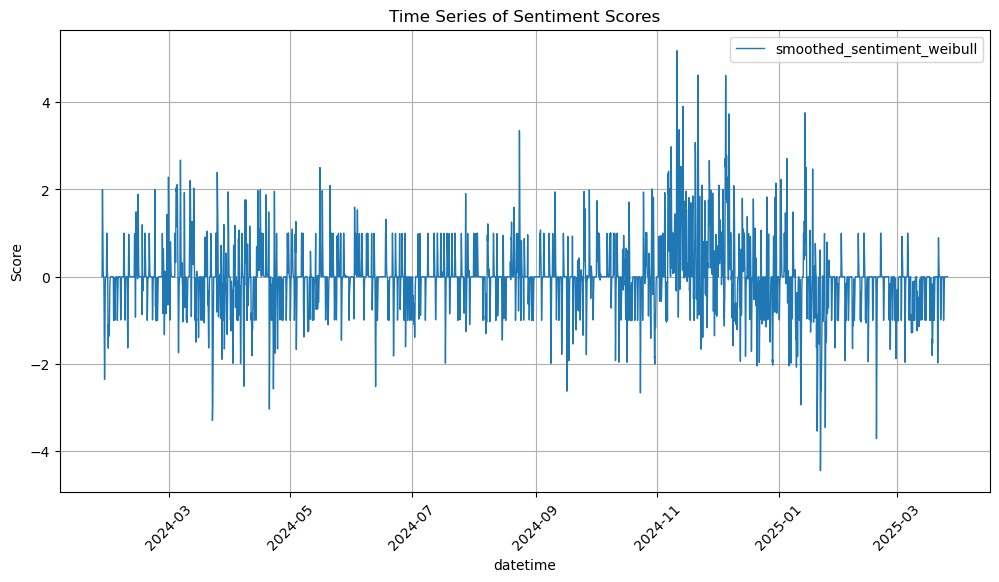

In [10]:
# Plot btc price and sentiment

plt.figure(figsize=(12, 6))
plt.plot(btc_reddit_data['datetime'], btc_reddit_data['smoothed_sentiment_weibull'], label='smoothed_sentiment_weibull', linewidth=1)
# Formatting the plot
plt.xlabel("datetime")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [11]:
btc_reddit_data.columns


Index(['datetime', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTAL_TRADES',
       'TOTAL_TRADES_BUY', 'TOTAL_TRADES_SELL', 'VOLUME', 'VOLUME_BUY',
       'VOLUME_SELL', 'return', 'log_return', 'hourly_volatility', 'EMA_8',
       'EMA_13', 'EMA_21', 'EMA_Signal', 'EMA_short', 'EMA_long', 'MACD',
       'Signal_Line', 'MACD_Signal', 'MACD_Hist', 'SMA20', 'STD20', 'Upper_BB',
       'Lower_BB', 'RSI_14', 'BB_RSI_Signal', 'RSI_Signal', 'SMA_50',
       'SMA_200', 'GoldenCross_Signal', '%K', '%D', 'Stochastic_Signal', 'OBV',
       'OBV_EMA20', 'OBV_Signal', 'H-L', 'H-PC', 'L-PC', 'TR', 'ATR',
       'smoothed_sentiment', 'smoothed_sentiment_weibull', 'post_density'],
      dtype='object')

In [12]:
# Create a new dataframe with selected features
btc_reddit_data_selected_features = btc_reddit_data[['datetime',  
                       'EMA_8','EMA_13','EMA_21','EMA_Signal','EMA_short','EMA_long', 
                       'MACD','Signal_Line','MACD_Hist', # MACD Signal
                       'Upper_BB', 'Lower_BB', # Bollinger Bands Signal
                       'RSI_14', 'BB_RSI_Signal', 'RSI_Signal', # RSI Signal
                       'SMA_50', 'SMA_200', 'GoldenCross_Signal', # Golden Cross Signal
                       '%K', '%D', 'Stochastic_Signal', # Stochastic Oscillator Signal
                       'OBV','OBV_EMA20', 'OBV_Signal', # OBV Signal
                       'ATR', # ATR, volatility
                       'smoothed_sentiment_weibull',
                       'return',
                       'hourly_volatility',
                       'TOTAL_TRADES', # Trade is number of trades (someone put buy or sell order)
                       'VOLUME' # Volume is amount of cryptocurrency traded in BTC
                      ]]


In [13]:
btc_reddit_data_selected_features.rename(columns={'smoothed_sentiment_weibull': 'reddit_smoothed_sentiment_weibull'}, inplace=True)

C:\Users\Justin\AppData\Local\Temp\ipykernel_10516\2939886257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_reddit_data_selected_features.rename(columns={'smoothed_sentiment_weibull': 'reddit_smoothed_sentiment_weibull'}, inplace=True)


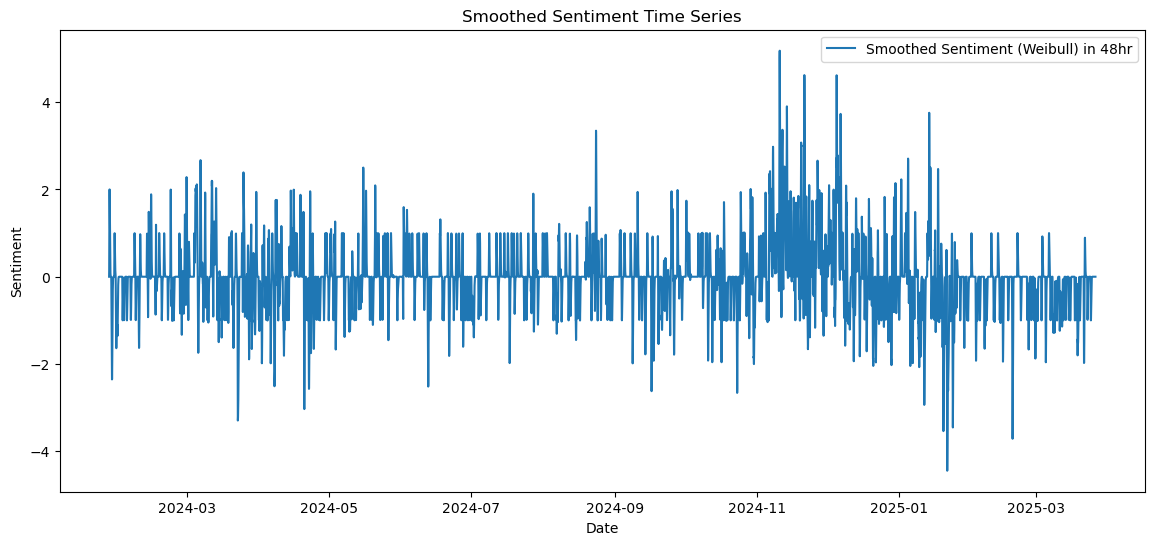

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(btc_reddit_data_selected_features['datetime'], btc_reddit_data_selected_features['reddit_smoothed_sentiment_weibull'], label='Smoothed Sentiment (Weibull) in 48hr')
plt.title('Smoothed Sentiment Time Series')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.show()


## Telegram Data

In [15]:
processed_data_folder_path = '../data/processed/'
telegram_data_path = os.path.join(processed_data_folder_path, "tele_messages_processed_hourly_2803.csv")
btc_telegram_data = pd.read_csv(telegram_data_path, index_col=0).reset_index().rename(columns = {'index': 'date'})

# Convert DATE column to datetime format
btc_telegram_data['date'] = pd.to_datetime(btc_telegram_data['date'])
btc_telegram_data = btc_telegram_data.sort_values(by='date').reset_index(drop = True)

In [17]:
btc_telegram_data.columns

Index(['date', 'text', 'channel_FedRussianInsiders',
       'channel_TechCryptoAnalyst', 'channel_Whalesguide',
       'channel_binancekillers', 'channel_cryptoclubpump',
       'channel_wallstreetqueenofficial', 'year', 'week', 'day', 'sentiment',
       'smoothed_sentiment', 'smoothed_sentiment_weibull'],
      dtype='object')

In [18]:
tele_data = btc_telegram_data[['date', 'smoothed_sentiment_weibull']]
tele_data.rename(columns={'smoothed_sentiment_weibull':'tele_smoothed_sentiment_weibull'},inplace=True)
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   date                             3396 non-null   datetime64[ns, UTC]
 1   tele_smoothed_sentiment_weibull  3396 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 53.2 KB


C:\Users\Justin\AppData\Local\Temp\ipykernel_10516\1556081304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tele_data.rename(columns={'smoothed_sentiment_weibull':'tele_smoothed_sentiment_weibull'},inplace=True)


In [19]:
tele_data

,date,tele_smoothed_sentiment_weibull
0,2024-01-01 06:00:00+00:00,0.000000
1,2024-01-01 11:00:00+00:00,0.997521
2,2024-01-01 15:00:00+00:00,1.516302
3,2024-01-01 20:00:00+00:00,1.388481
4,2024-01-01 20:00:00+00:00,1.388481
...,...,...
3391,2025-03-28 02:00:00+00:00,1.544826
3392,2025-03-28 05:00:00+00:00,-0.312898
3393,2025-03-28 06:00:00+00:00,-0.812884
3394,2025-03-28 07:00:00+00:00,-1.315048


### Test to see if sentiment is week or 48 hour

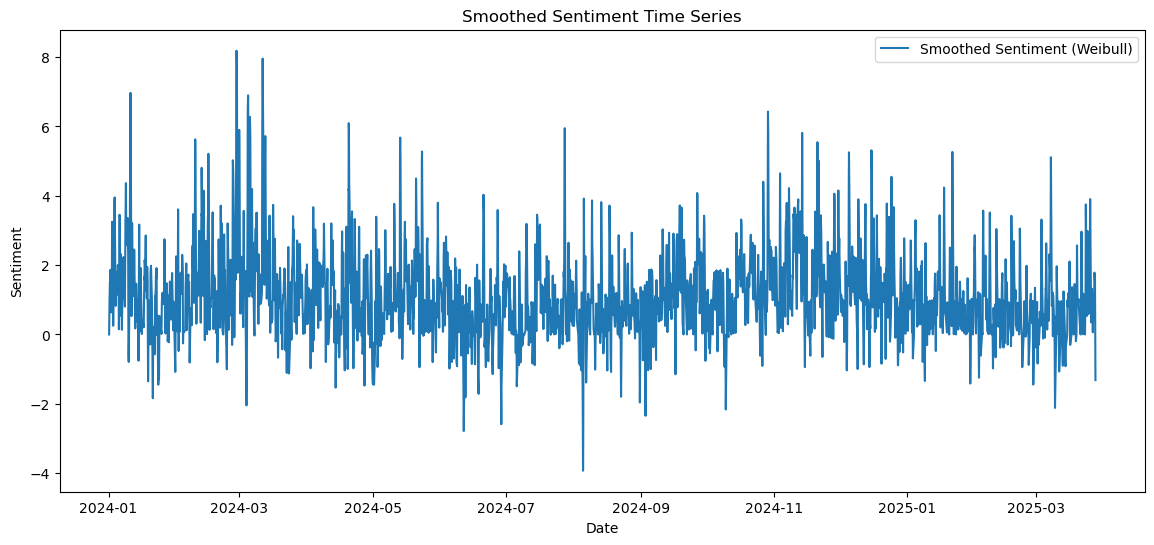

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(btc_telegram_data['date'], btc_telegram_data['smoothed_sentiment_weibull'], label='Smoothed Sentiment (Weibull)')
plt.title('Smoothed Sentiment Time Series')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.show()


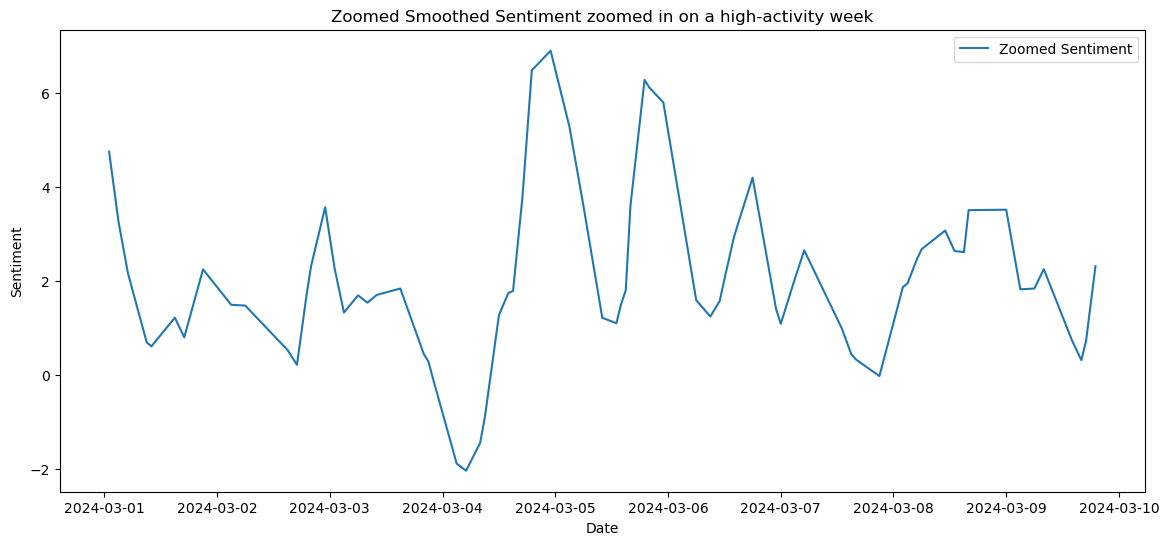

In [20]:
# Pick a high-activity week to zoom in
zoom = btc_telegram_data[(btc_telegram_data['date'] >= '2024-03-01') &
                         (btc_telegram_data['date'] <= '2024-03-10')]

plt.figure(figsize=(14,6))
plt.plot(zoom['date'], zoom['smoothed_sentiment_weibull'], label='Zoomed Sentiment')
plt.title('Zoomed Smoothed Sentiment zoomed in on a high-activity week')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.show()


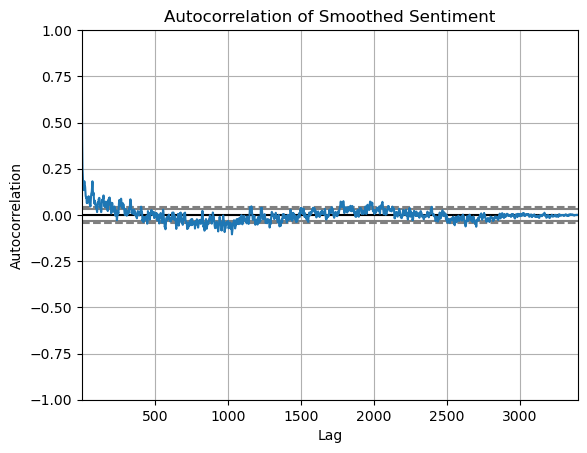

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(btc_telegram_data['smoothed_sentiment_weibull'].dropna())
plt.title('Autocorrelation of Smoothed Sentiment')
plt.show()


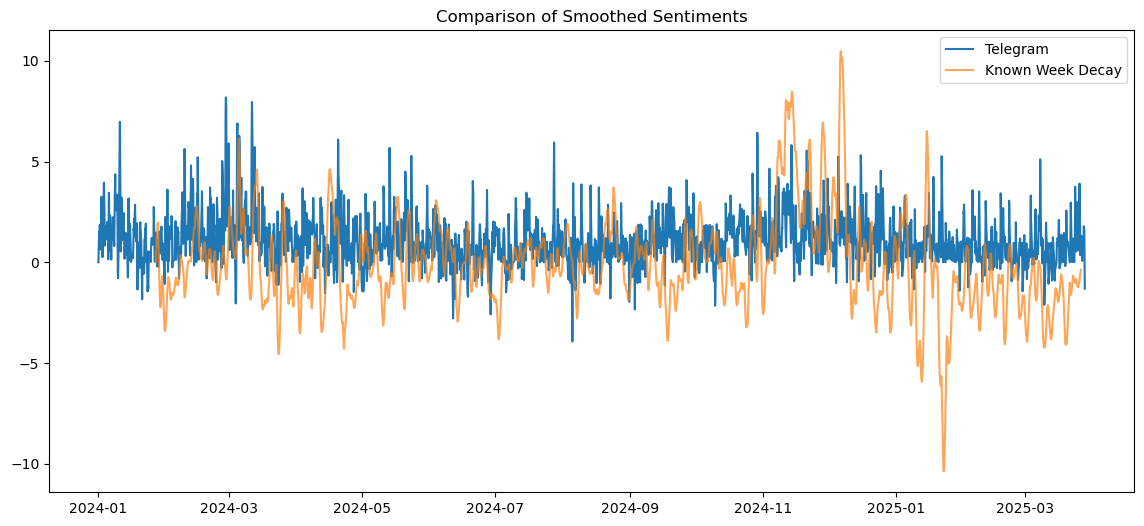

In [24]:
plt.figure(figsize=(14,6))
plt.plot(btc_telegram_data['date'], btc_telegram_data['smoothed_sentiment_weibull'], label='Telegram')
plt.plot(btc_reddit_data_selected_features['datetime'], btc_reddit_data_selected_features['reddit_smoothed_sentiment_weibull_week'], label='Known Week Decay', alpha=0.7)
plt.legend()
plt.title('Comparison of Smoothed Sentiments')
plt.show()


## MERGE

In [20]:
merged_df = btc_reddit_data_selected_features.merge(GDELT_df, left_on='datetime', right_on = "DATE", how='left').merge(tele_data, left_on='datetime', right_on = "date", how='left')
merged_df.drop(columns=['date','DATE'], inplace=True)
merged_df = merged_df.ffill()


In [21]:
merged_df

,datetime,EMA_8,EMA_13,EMA_21,EMA_Signal,EMA_short,EMA_long,MACD,Signal_Line,MACD_Hist,Upper_BB,Lower_BB,RSI_14,BB_RSI_Signal,RSI_Signal,SMA_50,SMA_200,GoldenCross_Signal,%K,%D,Stochastic_Signal,OBV,OBV_EMA20,OBV_Signal,ATR,reddit_smoothed_sentiment_weibull,return,hourly_volatility,TOTAL_TRADES,VOLUME,smoothed_sentiment_weibull,tele_smoothed_sentiment_weibull
0,2024-01-27 13:00:00+00:00,41729.550796,41714.525206,41617.761701,1,41720.541302,41533.453446,187.087856,256.308536,-69.220681,42105.044546,41524.488454,45.171588,0,0,40928.6316,40765.60695,0,72.793587,71.453152,0,-419.38468,-65.712408,0,175.710000,0.000000e+00,-0.000181,0.002460,35569,419.38468,-282.549265,1.221922
1,2024-01-27 14:00:00+00:00,41737.650619,41721.878748,41631.237910,1,41727.534948,41550.679117,176.855831,240.417995,-63.562164,42054.364704,41541.267296,48.792247,0,0,40966.7554,40767.06695,0,79.088844,75.565353,0,493.43458,-12.460314,1,140.500000,1.525704e-01,0.000564,0.002463,27238,493.43458,-254.609425,1.221922
2,2024-01-27 15:00:00+00:00,41754.617148,41735.038927,41647.852645,1,41740.837263,41570.184367,170.652896,226.464975,-55.812079,42009.435023,41561.147977,49.710914,0,0,41004.7586,40769.71570,0,91.914496,81.265642,0,581.25856,44.084341,0,109.318333,8.936436e-01,0.001149,0.002486,32410,581.25856,-219.488833,1.221922
3,2024-01-27 16:00:00+00:00,41766.964449,41745.773366,41662.609678,1,41751.505377,41587.961822,163.543555,213.880691,-50.337136,41982.672702,41571.210298,48.277493,0,0,41040.7034,40772.31665,0,90.893788,87.299043,0,-609.18361,-18.131655,-1,101.921667,1.492957e+00,-0.000091,0.002476,30278,609.18361,-179.063656,1.476407
4,2024-01-27 16:00:00+00:00,41766.964449,41745.773366,41662.609678,1,41751.505377,41587.961822,163.543555,213.880691,-50.337136,41982.672702,41571.210298,48.277493,0,0,41040.7034,40772.31665,0,90.893788,87.299043,0,-609.18361,-18.131655,-1,101.921667,1.492957e+00,-0.000091,0.002476,30278,609.18361,-179.063656,1.476407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,2025-03-26 08:00:00+00:00,87756.884904,87689.841782,87613.211597,1,87700.669674,87561.527416,139.142257,118.729110,20.413147,88274.835502,87158.682498,52.079917,0,0,87529.5676,85079.73220,0,81.688856,86.723553,-1,-525.11331,59.670458,-1,418.066667,-2.776625e-26,-0.002050,0.003058,59816,525.11331,-124.817849,0.348799
10769,2025-03-26 09:00:00+00:00,87797.574925,87725.577241,87642.918724,1,87737.488186,87589.561682,147.926504,124.568589,23.357915,88297.537586,87170.539414,47.097936,0,0,87550.8770,85103.62230,0,79.688735,87.125864,0,-393.09750,16.549700,0,392.118333,0.000000e+00,-0.000224,0.003034,43067,393.09750,-159.262060,0.348799
10770,2025-03-26 10:00:00+00:00,87888.884942,87794.561921,87694.332477,1,87809.946926,87635.406742,174.540184,134.562908,39.977276,88332.449280,87154.234720,55.898759,0,0,87566.7194,85127.82645,0,100.000000,87.125864,0,556.20541,67.945482,1,378.148333,0.000000e+00,0.003053,0.002934,55584,556.20541,-177.319311,0.348799
10771,2025-03-26 11:00:00+00:00,87903.568288,87817.475933,87718.025888,1,87832.256630,87659.077354,173.179276,142.286182,30.893094,88348.969556,87155.773444,53.277064,0,0,87582.5440,85151.86325,0,75.969705,85.219480,0,-940.31797,-28.079609,-1,362.111667,0.000000e+00,-0.002874,0.003087,67105,940.31797,-187.820013,0.348799


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10773 entries, 0 to 10772
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   datetime                           10773 non-null  datetime64[ns, UTC]
 1   EMA_8                              10773 non-null  float64            
 2   EMA_13                             10773 non-null  float64            
 3   EMA_21                             10773 non-null  float64            
 4   EMA_Signal                         10773 non-null  int64              
 5   EMA_short                          10773 non-null  float64            
 6   EMA_long                           10773 non-null  float64            
 7   MACD                               10773 non-null  float64            
 8   Signal_Line                        10773 non-null  float64            
 9   MACD_Hist                          10773 non-null 

In [23]:
merged_df_path = '../data/processed/merged_df_48hr.csv'

merged_df.to_csv(merged_df_path, index=False)